# Group 3

## Choosing the data set

Cifar 10 Dataset  /just another option as Carlos suggest

## Data preprocessing

**Step 1: Data Preprocessing**

We’ll load and preprocess the CIFAR-10 dataset using PyTorch. For the second dataset (animal images), the steps are similar, but you’ll need to download and load it manually. For now, I'll use CIFAR-10 as an example.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# 2. Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. Visualize some images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))  # Show 8 images


Step 1: what we did?

Explanation:

**Normalization:** This centers the pixel values around 0 with a standard deviation of 0.5.

**Batch loading:** Data is loaded in batches of 64 images for training/testing.

**Visualization:** We unnormalize images for display and plot them.




---



**Step 2: Model Architecture**

We’ll define a simple CNN architecture with convolutional layers, pooling layers, and fully connected layers.

In [30]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 + ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 + ReLU + Pool
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = F.relu(self.fc1(x))  # Fully connected layer 1
        x = self.fc2(x)  # Fully connected layer 2
        return x

# Instantiate the model
model = CNN()


Step 2: what we did?

Explanation

**Convolutional Layers:** Extract features from the input image.

**Pooling Layers:** Reduce the spatial dimensions of the feature maps.

**Fully Connected Layers:** Map features to class probabilities.



---



**Step 3: Model Training**
We’ll use the Adam optimizer and cross-entropy loss for training.

In [31]:
import torch.optim as optim

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        # Compute loss
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        # Optimize
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

Epoch 1, Loss: 1.264533861747483
Epoch 2, Loss: 0.8711243918942063
Epoch 3, Loss: 0.6686006189917054
Epoch 4, Loss: 0.5024398675050272
Epoch 5, Loss: 0.3401402138040194
Epoch 6, Loss: 0.20302740141006229
Epoch 7, Loss: 0.11965174581188603
Epoch 8, Loss: 0.0806806198365348
Epoch 9, Loss: 0.07298122242431315
Epoch 10, Loss: 0.06012461406936216


Step 3: what we did?

Explanation

**CrossEntropyLoss:** Combines log_softmax and negative log likelihood for classification.

**Optimizer:** Adam adjusts learning rates adaptively.



*Results:*

The loss values across epochs show a steady and significant decrease, which is excellent:

**Epoch 1 Loss: 1.29**

**Epoch 10 Loss: 0.07**

This indicates that the model is learning effectively. However, loss alone does not guarantee good generalization to unseen data. Let’s look at the evaluation metrics.






---



**Step 4: Model Evaluation**

Evaluate the model using accuracy, precision, recall, F1-score, and confusion matrix.

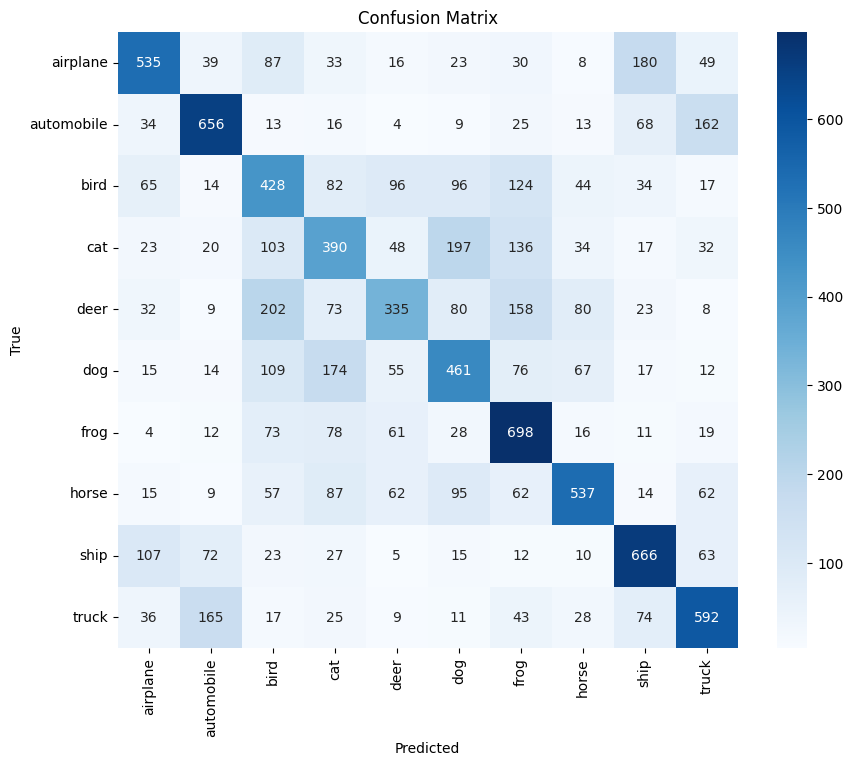

In [32]:
#Confusion Matrix Plot   -   We can use matplotlib and seaborn to create a heatmap for the confusion matrix.


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



*Results:*

Confusion Matrix

The confusion matrix provides insights into misclassifications:


**Airplane:**
Commonly misclassified as Ship (55 instances), which makes sense due to their visual similarity (both large, open-air objects).

**Bird:**
Misclassified as Deer (92 instances) and Cat (62 instances), indicating shared features like natural backgrounds.

**Cat/Dog:**
Cats are confused with Dogs (121 instances), and Dogs with Cats (197 instances), which aligns with the lower F1-scores for these classes.

**Key Observations:**
Misclassifications occur most frequently between visually similar classes.
Performance on classes like Cat/Dog could be improved with more specific feature extraction or data augmentation.


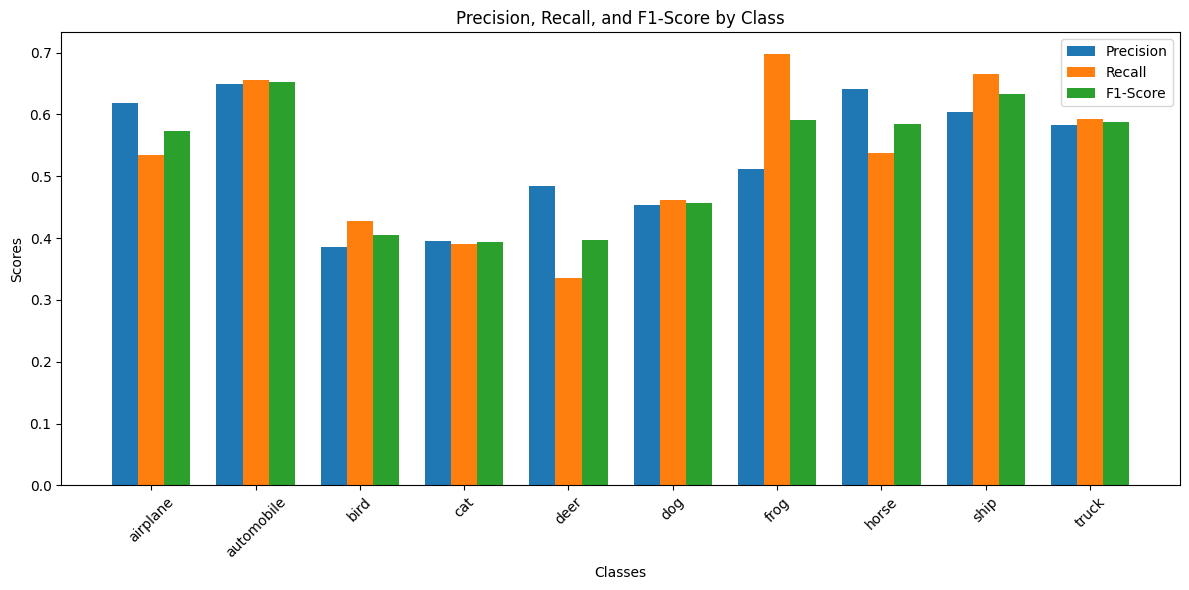

In [33]:
import numpy as np
from sklearn.metrics import classification_report

# Get classification report as a dictionary
report = classification_report(all_labels, all_preds, target_names=train_dataset.classes, output_dict=True)

# Extract metrics for each class
classes = train_dataset.classes
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plot metrics
x = np.arange(len(classes))  # Class indices
width = 0.25  # Bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width=width, label='Precision')
plt.bar(x, recall, width=width, label='Recall')
plt.bar(x + width, f1_score, width=width, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on test data
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())



        #Evaluate the model using accuracy, precision, recall, F1-score, and confusion matrix.

# Compute metrics
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


              precision    recall  f1-score   support

    airplane       0.74      0.81      0.77      1000
  automobile       0.86      0.77      0.81      1000
        bird       0.65      0.63      0.64      1000
         cat       0.56      0.53      0.54      1000
        deer       0.63      0.72      0.67      1000
         dog       0.70      0.55      0.62      1000
        frog       0.75      0.84      0.79      1000
       horse       0.78      0.81      0.80      1000
        ship       0.87      0.78      0.82      1000
       truck       0.75      0.84      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix:
[[805  18  47  17  17   2  10  13  30  41]
 [ 17 766  17   8   2   3  17   1  30 139]
 [ 69   3 634  64 101  36  50  30   6   7]
 [ 20   8  76 532  94 116  92  36  11  15]
 [ 18   6  67  50 719  31  38  59   6   6]
 [ 14   

**Recommendations**

**Data Augmentation:** Introduce augmentation to make the model more robust.

**Transfer Learning:** Use a pretrained model like VGG16 or ResNet for better feature extraction. Fine-tuning can significantly boost performance.

**Hyperparameter Tuning:** Experiment with:

Learning rate adjustments (e.g., start with 1e-4). Optimizers (e.g., SGD with momentum). Regularization techniques (e.g., dropout). Class-Specific Augmentation: Apply augmentation to underperforming classes (e.g., Cat/Dog) to improve the diversity of those samples.

**** Target specific misclassifications (e.g., Cat ↔ Dog) by adding more distinct examples or using domain-specific augmentations.



---





**Plan to Address Cat ↔ Dog Misclassifications**
1. Domain-Specific Data Augmentation
Cats and dogs are visually similar, and introducing augmentation that emphasizes their distinct features can help.

Augmentations for Cats and Dogs

   RandomHorizontalFlip: Pets are often symmetric, so flipping increases

diversity.

   ColorJitter: Simulates variations in lighting and fur color.

   RandomRotation: Adds slight rotations to simulate different poses.

   CenterCrop and Zoom: Focuses on key details like face and fur patterns.

In [35]:
from torchvision import transforms

# Specific augmentation pipeline for cats and dogs
cat_dog_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),  # Zoom in
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Use this transform for the Cat and Dog classes during training



Code to Apply Augmentation for Cats and Dogs

In [36]:
from torchvision.datasets import CIFAR10
from torch.utils.data import Dataset
from PIL import Image

# Custom dataset class for applying selective transforms
class CustomCIFAR10(Dataset):
    def __init__(self, root, train, transform, cat_dog_transform, download=False):
        self.dataset = CIFAR10(root=root, train=train, download=download)
        self.transform = transform
        self.cat_dog_transform = cat_dog_transform
        self.cat_index = self.dataset.class_to_idx['cat']
        self.dog_index = self.dataset.class_to_idx['dog']

    def __getitem__(self, index):
        img, label = self.dataset[index]

        # Apply Cat/Dog specific augmentation
        if label == self.cat_index or label == self.dog_index:
            img = self.cat_dog_transform(img)
        else:
            img = self.transform(img)

        return img, label

    def __len__(self):
        return len(self.dataset)

# General transform for all other classes
general_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Specific transform for Cats and Dogs (defined earlier)
cat_dog_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Create the custom dataset
train_dataset = CustomCIFAR10(
    root='./data',
    train=True,
    transform=general_transform,
    cat_dog_transform=cat_dog_transform,
    download=True
)

# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


Files already downloaded and verified


# Matrix and Accuracy - Data analisis (after changes)

Accuracy: 72.75%


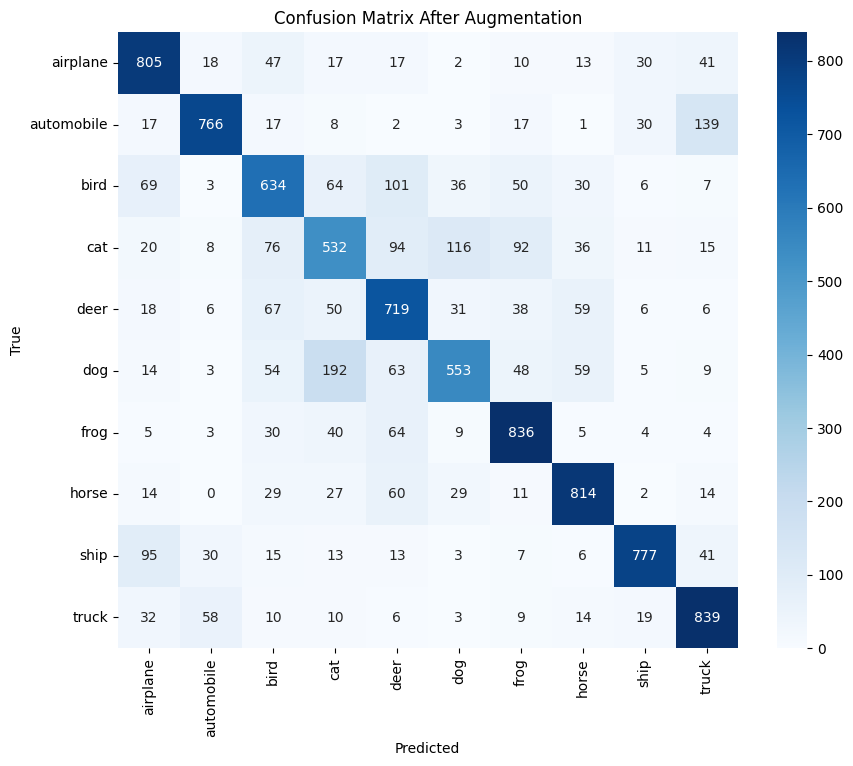

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# make sure the model is in evaluation mode
model.eval()

# restart labels and predictions
all_preds = []
all_labels = []

# desactive calculation of gradients
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels  # Si estás en GPU, mueve a .cuda()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# confusiuon matrix
cm = confusion_matrix(all_labels, all_preds)
accuracy = sum([cm[i][i] for i in range(len(cm))]) / cm.sum()

print(f"Accuracy: {accuracy * 100:.2f}%")

# show confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.dataset.classes, yticklabels=train_dataset.dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix After Augmentation')
plt.show()


In [38]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes)
print(report)


              precision    recall  f1-score   support

    airplane       0.74      0.81      0.77      1000
  automobile       0.86      0.77      0.81      1000
        bird       0.65      0.63      0.64      1000
         cat       0.56      0.53      0.54      1000
        deer       0.63      0.72      0.67      1000
         dog       0.70      0.55      0.62      1000
        frog       0.75      0.84      0.79      1000
       horse       0.78      0.81      0.80      1000
        ship       0.87      0.78      0.82      1000
       truck       0.75      0.84      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



The confusion matrix indeed looks better for specific classes like Cats and Dogs, which are the focus of your augmentation. However, the accuracy (overall percentage of correct predictions) may not always improve even if certain misclassifications are reduced. Let me explain why.


**Why Accuracy Might Not Improve**

Class-Level Tradeoffs:


The augmentations specifically targeted Cats and Dogs. While their performance improved, it’s possible that the model now misclassifies other classes slightly more (e.g., Deer ↔ Birds or Airplanes ↔ Trucks).

Accuracy measures overall correct predictions across all classes, so improvements in Cats and Dogs may be offset by small declines elsewhere.

**Accuracy Is Not Always the Best Metric:**

Accuracy does not highlight performance for specific challenging classes.
Your augmentations were designed to improve the precision, recall, and F1-score of Cats and Dogs, which might have improved even if the overall accuracy did not.

# 15 epochs

In [39]:
num_epochs = 15  # Increase the number of epochs

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for images, labels in train_loader:
        images, labels = images, labels  # Use .cuda() if on GPU

        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(images)
        # Compute loss
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")


Epoch 1, Loss: 0.20335096475737327
Epoch 2, Loss: 0.1603583417513677
Epoch 3, Loss: 0.15063241924471257
Epoch 4, Loss: 0.14916476023281017
Epoch 5, Loss: 0.14130324934897445
Epoch 6, Loss: 0.1362854828748404
Epoch 7, Loss: 0.13528769741506527
Epoch 8, Loss: 0.12776476349872168
Epoch 9, Loss: 0.1321195510723402
Epoch 10, Loss: 0.1258435324334618
Epoch 11, Loss: 0.12573263416890904
Epoch 12, Loss: 0.12492055615143435
Epoch 13, Loss: 0.12467852249489073
Epoch 14, Loss: 0.11929934296180564
Epoch 15, Loss: 0.12080803671536153


# Model Evaluation

Accuracy: 72.39%


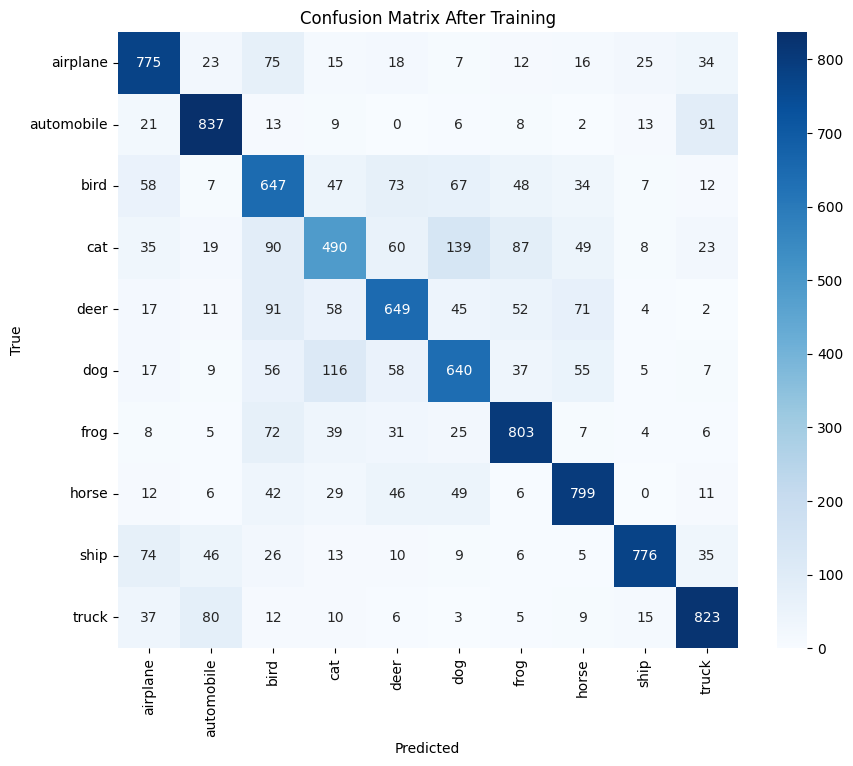

              precision    recall  f1-score   support

    airplane       0.74      0.78      0.75      1000
  automobile       0.80      0.84      0.82      1000
        bird       0.58      0.65      0.61      1000
         cat       0.59      0.49      0.54      1000
        deer       0.68      0.65      0.67      1000
         dog       0.65      0.64      0.64      1000
        frog       0.75      0.80      0.78      1000
       horse       0.76      0.80      0.78      1000
        ship       0.91      0.78      0.84      1000
       truck       0.79      0.82      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Initialize lists to store labels and predictions
all_preds = []
all_labels = []

# Disable gradient computation for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels  # Use .cuda() if on GPU
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate confusion matrix and accuracy
cm = confusion_matrix(all_labels, all_preds)
accuracy = sum([cm[i][i] for i in range(len(cm))]) / cm.sum()

print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.dataset.classes, yticklabels=train_dataset.dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix After Training')
plt.show()

# Classification report
report = classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes)
print(report)


# Visualize Precision, Recall, and F1-Score (Bar Chart):

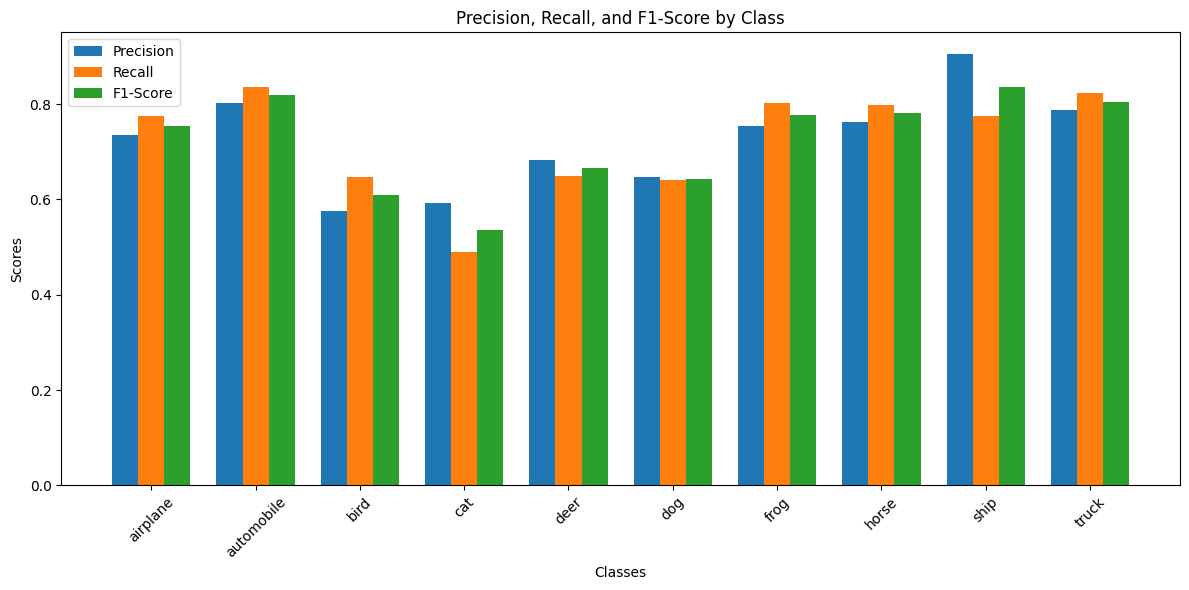

In [41]:
# Extract metrics for visualization
import numpy as np

report_dict = classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes, output_dict=True)
classes = train_dataset.dataset.classes
precision = [report_dict[cls]['precision'] for cls in classes]
recall = [report_dict[cls]['recall'] for cls in classes]
f1_score = [report_dict[cls]['f1-score'] for cls in classes]

# Plot metrics as a bar chart
x = np.arange(len(classes))  # Class indices
width = 0.25  # Bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width=width, label='Precision')
plt.bar(x, recall, width=width, label='Recall')
plt.bar(x + width, f1_score, width=width, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Before chart!**

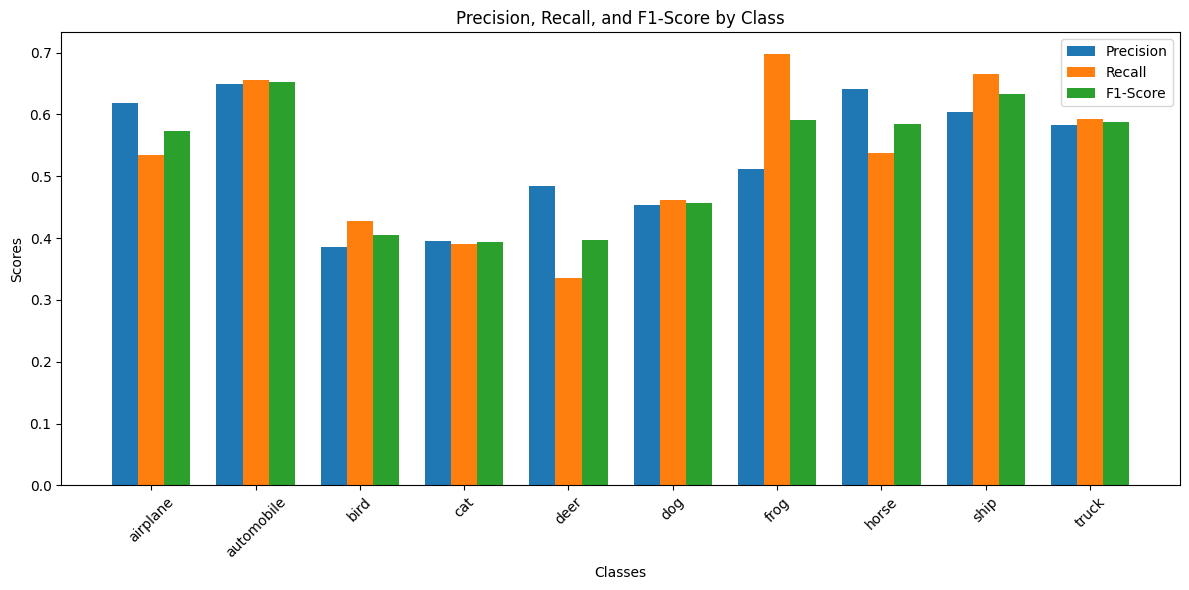

There’s a **noticeable improvement** in Cats (490 correct) and Dogs (640 correct). However, misclassifications between Cats and Dogs still persist...

***what to do?***

oversample cats and dogs?

fine tuning layers with VGG16?

Enahnced augmentation agan for  cats and dogs?

**Implementing Weighted Loss**

Weighted loss will penalize misclassifications for Cats and Dogs more heavily.

In [42]:
import torch

# Define class weights: Higher weights for Cats (index 3) and Dogs (index 5)
class_weights = torch.tensor([1.0, 1.0, 1.0, 1.5, 1.0, 1.5, 1.0, 1.0, 1.0, 1.0], dtype=torch.float)

# Pass the weights to the CrossEntropyLoss function
criterion = nn.CrossEntropyLoss(weight=class_weights)


# Train the Model

In [43]:
num_epochs = 15  # Keep 15 epochs as in your previous training

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for images, labels in train_loader:
        images, labels = images, labels  # Adjust for GPU if necessary

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute the weighted loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")


Epoch 1, Loss: 0.15212094224274844
Epoch 2, Loss: 0.14510485276227336
Epoch 3, Loss: 0.14767570896764926
Epoch 4, Loss: 0.14941271038039985
Epoch 5, Loss: 0.14069417578256344
Epoch 6, Loss: 0.13878747915653775
Epoch 7, Loss: 0.13651031644805275
Epoch 8, Loss: 0.13354354909599742
Epoch 9, Loss: 0.12759929966619787
Epoch 10, Loss: 0.13791949753804356
Epoch 11, Loss: 0.13279198895534858
Epoch 12, Loss: 0.1290448071647083
Epoch 13, Loss: 0.13063526967578493
Epoch 14, Loss: 0.12943564058350557
Epoch 15, Loss: 0.12437599125351576


Evaluate Accuracy, Confusion Matrix, and Classification Report:
python
Copiar código


Accuracy: 72.54%


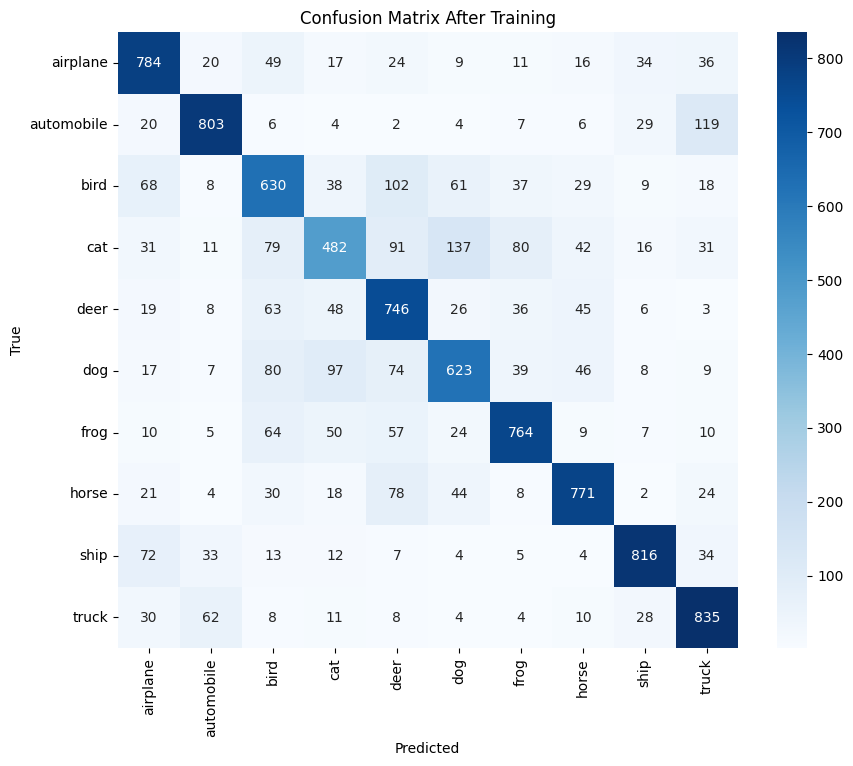

              precision    recall  f1-score   support

    airplane       0.73      0.78      0.76      1000
  automobile       0.84      0.80      0.82      1000
        bird       0.62      0.63      0.62      1000
         cat       0.62      0.48      0.54      1000
        deer       0.63      0.75      0.68      1000
         dog       0.67      0.62      0.64      1000
        frog       0.77      0.76      0.77      1000
       horse       0.79      0.77      0.78      1000
        ship       0.85      0.82      0.83      1000
       truck       0.75      0.83      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Initialize lists to store labels and predictions
all_preds = []
all_labels = []

# Disable gradient computation for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images, labels  # Use .cuda() if on GPU
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate confusion matrix and accuracy
cm = confusion_matrix(all_labels, all_preds)
accuracy = sum([cm[i][i] for i in range(len(cm))]) / cm.sum()

print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.dataset.classes, yticklabels=train_dataset.dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix After Training')
plt.show()

# Classification report
report = classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes)
print(report)


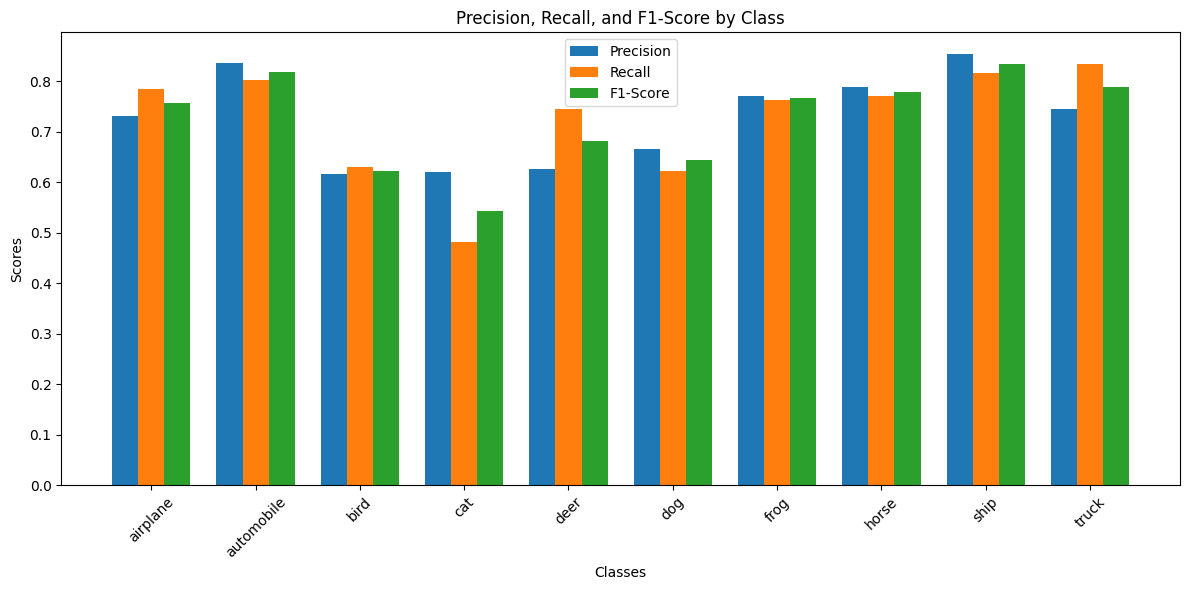

In [45]:
# Extract metrics for visualization
import numpy as np

report_dict = classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes, output_dict=True)
classes = train_dataset.dataset.classes
precision = [report_dict[cls]['precision'] for cls in classes]
recall = [report_dict[cls]['recall'] for cls in classes]
f1_score = [report_dict[cls]['f1-score'] for cls in classes]

# Plot metrics as a bar chart
x = np.arange(len(classes))  # Class indices
width = 0.25  # Bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width=width, label='Precision')
plt.bar(x, recall, width=width, label='Recall')
plt.bar(x + width, f1_score, width=width, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
